In [48]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
slv = xr.open_dataset("slv.nc4")
aer = xr.open_dataset("aer.nc4")
slv.head()
print()
aer.head()

<xarray.Dataset>
Dimensions:    (lon: 5, lat: 5, time: 5)
Coordinates:
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 -177.5
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0
  * time       (time) datetime64[ns] 1980-01-01T00:30:00 ... 1980-01-01T04:30:00
Data variables: (12/50)
    BCANGSTR   (time, lat, lon) float32 ...
    BCCMASS    (time, lat, lon) float32 ...
    BCEXTTAU   (time, lat, lon) float32 ...
    BCFLUXU    (time, lat, lon) float32 ...
    BCFLUXV    (time, lat, lon) float32 ...
    BCSCATAU   (time, lat, lon) float32 ...
    ...         ...
    SUFLUXU    (time, lat, lon) float32 ...
    SUFLUXV    (time, lat, lon) float32 ...
    SUSCATAU   (time, lat, lon) float32 ...
    TOTANGSTR  (time, lat, lon) float32 ...
    TOTEXTTAU  (time, lat, lon) float32 ...
    TOTSCATAU  (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_aer_Nx.19800101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/KLICLTZ8EM9D
    RangeBeginningDate:                1980-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000

In [27]:
#delhi
lat = 28.6
lon = 77.2

In [28]:
print(slv.data_vars)

Data variables:
    CLDPRS    (time, lat, lon) float32 ...
    CLDTMP    (time, lat, lon) float32 ...
    DISPH     (time, lat, lon) float32 ...
    H1000     (time, lat, lon) float32 ...
    H250      (time, lat, lon) float32 ...
    H500      (time, lat, lon) float32 ...
    H850      (time, lat, lon) float32 ...
    OMEGA500  (time, lat, lon) float32 ...
    PBLTOP    (time, lat, lon) float32 ...
    PS        (time, lat, lon) float32 ...
    Q250      (time, lat, lon) float32 ...
    Q500      (time, lat, lon) float32 ...
    Q850      (time, lat, lon) float32 ...
    QV10M     (time, lat, lon) float32 ...
    QV2M      (time, lat, lon) float32 ...
    SLP       (time, lat, lon) float32 ...
    T10M      (time, lat, lon) float32 ...
    T250      (time, lat, lon) float32 ...
    T2M       (time, lat, lon) float32 ...
    T2MDEW    (time, lat, lon) float32 ...
    T2MWET    (time, lat, lon) float32 ...
    T500      (time, lat, lon) float32 ...
    T850      (time, lat, lon) float32

In [29]:
t2m = slv['T2M'].sel(lat = lat , lon = lon , method = 'nearest')       #temp above 2m
qv2m = slv['QV2M'].sel(lat = lat , lon = lon , method = 'nearest')     #humidity above 2m
ps = slv['PS'].sel(lat=lat, lon=lon, method='nearest')                 #surface pressure
slp = slv['SLP'].sel(lat=lat, lon=lon, method='nearest')               #sea level pressure

In [30]:
print(aer.data_vars)

Data variables:
    BCANGSTR   (time, lat, lon) float32 ...
    BCCMASS    (time, lat, lon) float32 ...
    BCEXTTAU   (time, lat, lon) float32 ...
    BCFLUXU    (time, lat, lon) float32 ...
    BCFLUXV    (time, lat, lon) float32 ...
    BCSCATAU   (time, lat, lon) float32 ...
    BCSMASS    (time, lat, lon) float32 ...
    DMSCMASS   (time, lat, lon) float32 ...
    DMSSMASS   (time, lat, lon) float32 ...
    DUANGSTR   (time, lat, lon) float32 ...
    DUCMASS    (time, lat, lon) float32 ...
    DUCMASS25  (time, lat, lon) float32 ...
    DUEXTT25   (time, lat, lon) float32 ...
    DUEXTTAU   (time, lat, lon) float32 ...
    DUFLUXU    (time, lat, lon) float32 ...
    DUFLUXV    (time, lat, lon) float32 ...
    DUSCAT25   (time, lat, lon) float32 ...
    DUSCATAU   (time, lat, lon) float32 ...
    DUSMASS    (time, lat, lon) float32 ...
    DUSMASS25  (time, lat, lon) float32 ...
    OCANGSTR   (time, lat, lon) float32 ...
    OCCMASS    (time, lat, lon) float32 ...
    OCEXTTAU   (

In [31]:
bc = aer['BCSMASS'].sel(lat = lat , lon = lon , method = 'nearest')              #Black Carbon Mass
dust = aer['DUSMASS'].sel(lat = lat , lon = lon , method = 'nearest')            #Dust Mass <2.5um

In [32]:
#creating a complete table

#features 
df = t2m.to_dataframe().reset_index()                              #added time also
df['Humidity'] = qv2m.values
df['Pressure'] = ps.values
df['Sea_Level_Pressure'] = slp.values

#labels
df['Black_Carbon'] = bc.values
df['Dust_Mass'] = dust.values

df.head(100)

,time,lon,lat,T2M,Humidity,Pressure,Sea_Level_Pressure,Black_Carbon,Dust_Mass
0,1980-01-01 00:30:00,77.5,28.5,284.553589,0.005428,98610.976562,101026.875000,1.799900e-09,7.134822e-09
1,1980-01-01 01:30:00,77.5,28.5,284.212250,0.005510,98657.226562,101080.078125,1.969976e-09,7.074838e-09
2,1980-01-01 02:30:00,77.5,28.5,284.249237,0.005655,98727.414062,101158.507812,2.077299e-09,7.007513e-09
3,1980-01-01 03:30:00,77.5,28.5,285.207489,0.005884,98828.359375,101262.281250,1.774435e-09,7.027543e-09
4,1980-01-01 04:30:00,77.5,28.5,286.163788,0.006182,98952.320312,101386.000000,1.451108e-09,7.333158e-09
5,1980-01-01 05:30:00,77.5,28.5,286.861176,0.006379,98981.218750,101416.960938,1.230100e-09,8.095351e-09
6,1980-01-01 06:30:00,77.5,28.5,287.717834,0.006460,98924.687500,101356.437500,1.087764e-09,1.035816e-08
7,1980-01-01 07:30:00,77.5,28.5,289.704224,0.006607,98831.617188,101254.312500,9.622596e-10,1.732491e-08
8,1980-01-01 08:30:00,77.5,28.5,291.115295,0.006845,98733.148438,101162.328125,8.481185e-10,3.162213e-08
9,1980-01-01 09:30:00,77.5,28.5,291.384460,0.006994,98685.351562,101111.664062,7.944441e-10,4.068722e-08


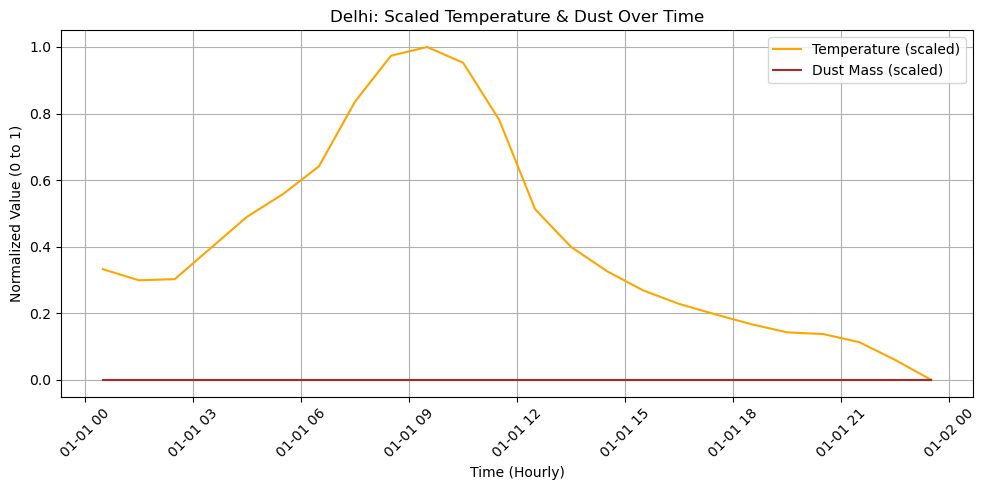

In [33]:
#Normalizing both axis to get a proper graph to just see the variation with time 
from sklearn.preprocessing import MinMaxScaler                

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['T2M', 'Dust_Mass']])

plt.figure(figsize=(10, 5))
plt.plot(df['time'], scaled[:, 0], label='Temperature (scaled)', color='orange')
plt.plot(df['time'], scaled[:, 1], label='Dust Mass (scaled)', color='brown')
plt.title("Delhi: Scaled Temperature & Dust Over Time")
plt.xlabel("Time (Hourly)")
plt.ylabel("Normalized Value (0 to 1)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#not getting any good interpretation

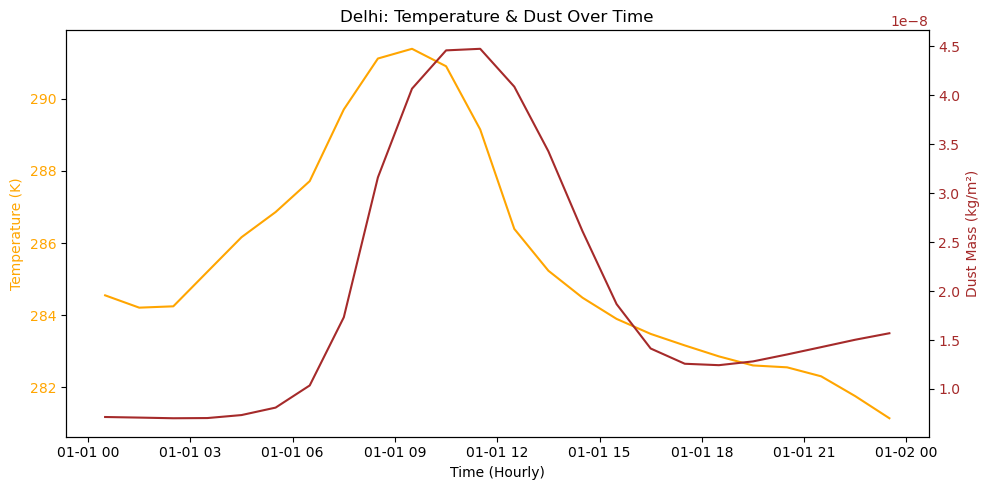

In [34]:
#plotting graphs using two axis

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot temperature on primary y-axis
ax1.plot(df['time'], df['T2M'], color='orange', label='Temperature (K)')
ax1.set_xlabel("Time (Hourly)")
ax1.set_ylabel("Temperature (K)", color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Plot dust mass on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['time'], df['Dust_Mass'], color='brown', label='Dust Mass')
ax2.set_ylabel("Dust Mass (kg/m²)", color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

plt.title("Delhi: Temperature & Dust Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
correlation = df.corr(numeric_only = True)
correlation['Dust_Mass'].sort_values(ascending = False)

Dust_Mass             1.000000
Humidity              0.688537
T2M                   0.607481
Sea_Level_Pressure   -0.545085
Pressure             -0.574753
Black_Carbon         -0.748308
lon                        NaN
lat                        NaN
Name: Dust_Mass, dtype: float64

In [36]:
X = df[['Humidity' , 'T2M' , 'Pressure' , 'Sea_Level_Pressure' , 'Black_Carbon']]
y = df['Dust_Mass']

In [37]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size = 0.2 , random_state = 42)

In [39]:
#Linear Regression Model Trining

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train , y_train)

LinearRegression()

In [40]:
#Finding the score for our model

from sklearn.metrics import r2_score , mean_absolute_error
import matplotlib.pyplot as plt

y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)

print("R2 Score -->", r2)
print("Mean Absolute Error(MAE)-->", mae)

R2 Score --> 0.948894811799421
Mean Absolute Error(MAE)--> 2.450554e-09


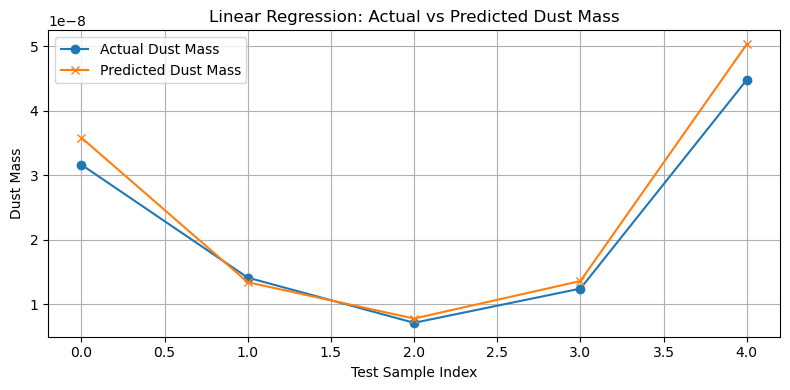

In [41]:
#Plotting graph between Actual vs Predicted Values

plt.figure(figsize = (8, 4))
plt.plot(y_test.values, label = "Actual Dust Mass", marker =  'o')
plt.plot(y_pred , label = "Predicted Dust Mass" , marker = 'x')
plt.title("Linear Regression: Actual vs Predicted Dust Mass")
plt.xlabel("Test Sample Index")
plt.ylabel("Dust Mass")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
#More cities for Random Forest Model
cities = {
    'Delhi': (28.7041, 77.1025),
    'Mumbai': (19.0760, 72.8777),
    'Chennai': (13.0827, 80.2707),
    'Kolkata': (22.5726, 88.3639),
    'Bangalore': (12.9716, 77.5946)
}

In [51]:
records = []

for city, (lat, lon) in cities.items():
    for i in range(len(slv.time)):
        row = {
            'city': city,
            'time': pd.to_datetime(slv.time[i].values),
            'T2M': float(slv['T2M'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
            'QV2M': float(slv['QV2M'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
            'PS': float(slv['PS'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
            'SLP': float(slv['SLP'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
            'T500': float(slv['T500'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
            'T850': float(slv['T850'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
            'TOX': float(slv['TOX'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
            'TO3': float(slv['TO3'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
            'U10M': float(slv['U10M'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
            'V10M': float(slv['V10M'].isel(time=i).sel(lat=lat, lon=lon, method='nearest')),
        }

        try:
            row['Dust_Mass'] = float(aer['DUSMASS'].isel(time=i).sel(lat=lat, lon=lon, method='nearest'))
        except:
            row['Dust_Mass'] = np.nan

        records.append(row)

df_rf_raw = pd.DataFrame(records)

In [52]:
df_rf_raw.head(200)

,city,time,T2M,QV2M,PS,SLP,T500,T850,TOX,TO3,U10M,V10M,Dust_Mass
0,Delhi,1980-01-01 00:30:00,284.366089,0.006050,98346.976562,101041.875000,255.200226,281.323181,0.005733,267.435242,-2.086475,2.657425,9.248488e-09
1,Delhi,1980-01-01 01:30:00,283.985687,0.006248,98417.226562,101119.328125,255.302307,280.764954,0.005734,267.397797,-1.673587,2.057738,9.477723e-09
2,Delhi,1980-01-01 02:30:00,283.936737,0.006388,98479.414062,101178.007812,255.704834,280.414917,0.005762,268.218781,-1.733451,1.434577,9.703255e-09
3,Delhi,1980-01-01 03:30:00,284.668427,0.006439,98540.359375,101241.781250,256.111511,280.400238,0.005805,270.186646,-2.144433,1.765080,1.242812e-08
4,Delhi,1980-01-01 04:30:00,285.921600,0.006514,98608.320312,101317.500000,256.143646,280.606506,0.005851,272.344971,-2.678489,2.112207,1.704110e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Bangalore,1980-01-01 19:30:00,286.353210,0.009925,91814.218750,100968.296875,268.430573,291.019196,0.005260,245.353729,-2.482577,0.890170,2.783054e-09
116,Bangalore,1980-01-01 20:30:00,285.722748,0.009917,91775.515625,100934.515625,268.336884,290.837280,0.005267,245.678375,-2.284075,1.055009,2.968594e-09
117,Bangalore,1980-01-01 21:30:00,285.192261,0.009936,91756.804688,100932.953125,268.300110,290.646545,0.005266,245.675629,-2.053692,1.222548,3.135037e-09
118,Bangalore,1980-01-01 22:30:00,284.798767,0.009959,91777.742188,100973.570312,268.357544,290.465057,0.005260,245.361420,-1.844234,1.307570,3.279656e-09


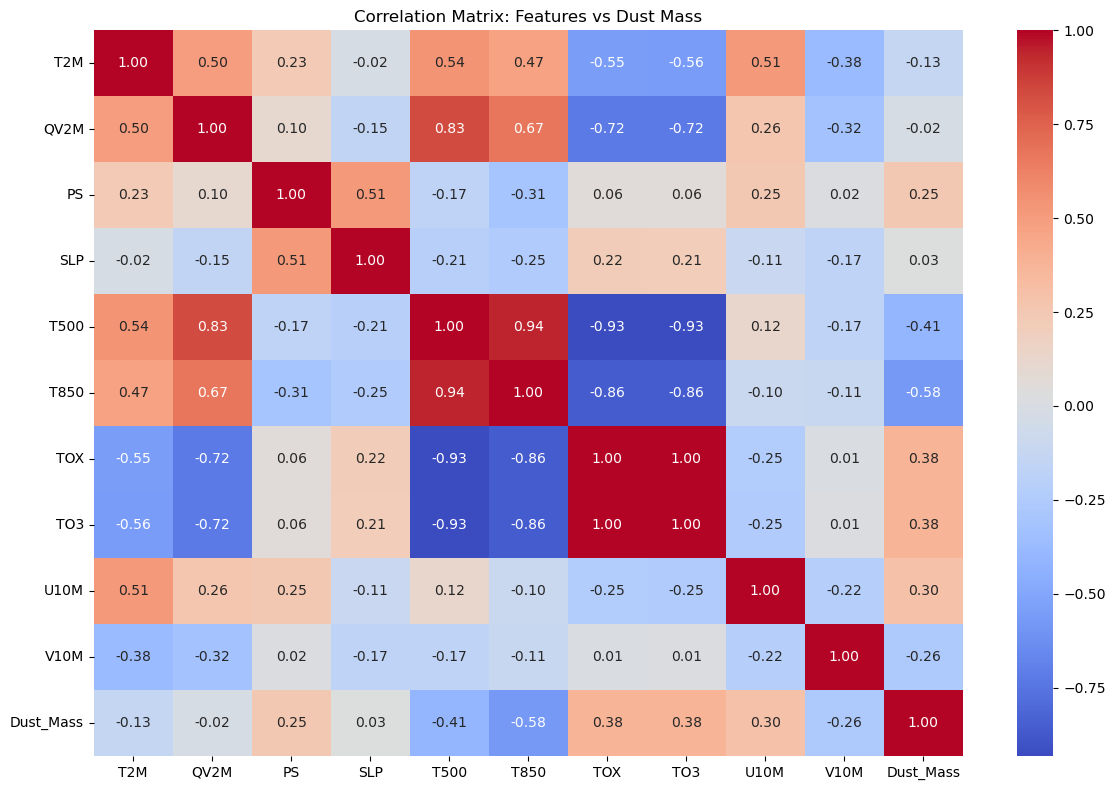

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df_rf_raw.dropna().select_dtypes(include='number')

corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Features vs Dust Mass")
plt.tight_layout()
plt.show()

In [56]:
corr_matrix_abs = corr_matrix.abs()
upper_triangle = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
df_filtered = df_corr.drop(columns=to_drop)

In [57]:
X = df_filtered.drop(columns = 'Dust_Mass')
y = df_filtered["Dust_Mass"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
print("Train Score:", rf_model.score(X_train, y_train))
print("Test Score:", rf_model.score(X_test, y_test))

Train Score: 0.7082786496319289
Test Score: 0.5301637465379649


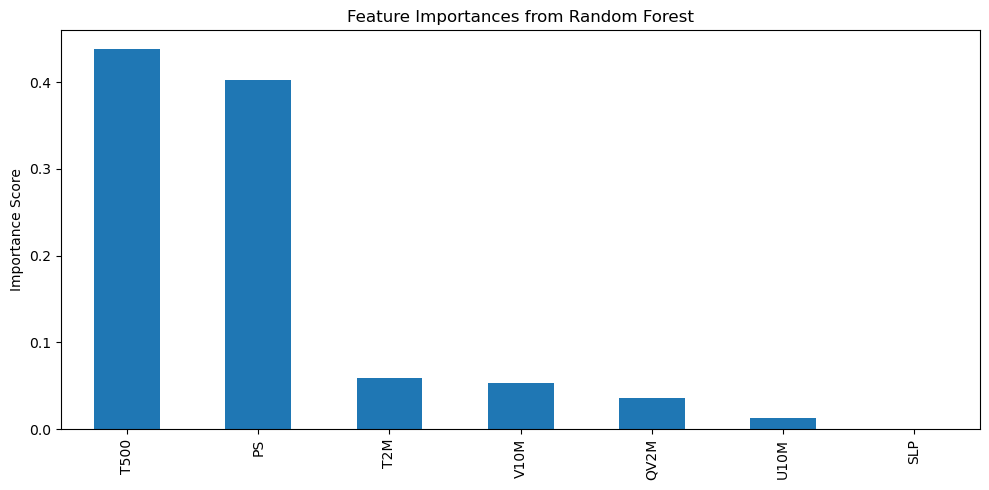

In [62]:
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
feat_imp.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [63]:
eff_features = ['T500', 'PS']                                                           #creating new features which contribute more to the model
eff_X = X[eff_features]

eff_X_train, eff_X_test, eff_y_train, eff_y_test = train_test_split(eff_X, y, test_size = 0.2, random_state = 42)

#new RF model to see if the score improves
eff_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
eff_rf.fit(eff_X_train, eff_y_train)

RandomForestRegressor(random_state=42)

In [65]:
print("Train Score (Top 2 features):", eff_rf.score(eff_X_train, eff_y_train))
print("Test Score  (Top 2 features):", eff_rf.score(eff_X_train, eff_y_train))

Train Score (Top 2 features): 0.6909855052506755
Test Score  (Top 2 features): 0.6909855052506755


In [67]:
# Trying with better-tuned RF model parameters
rf_tuned = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_tuned.fit(X_train, y_train)

print("Train Score (Tuned RF):", rf_tuned.score(X_train, y_train))
print("Test Score  (Tuned RF):", rf_tuned.score(X_test, y_test))

Train Score (Tuned RF): 0.7236790864107709
Test Score  (Tuned RF): 0.5467664062979487
